In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm
import scipy.stats as ss

In [76]:
# Question 1,2,3

In [77]:
import numpy as np

# Define the parameters
S0 = 100  # Spot price
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 0.25  # Time to maturity
N = 100000  # Number of simulations

import numpy as np

def monte_carlo_call(S0, K, r, sigma, T, N):
    dt = T/N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S = S0 * np.exp(drift + diffusion)
    C = np.maximum(S - K, 0)
    return np.mean(C)

def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

def monte_carlo_put(S0, K, r, sigma, T, N):
    dt = T /N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S = S0 * np.exp(drift + diffusion)
    P = np.maximum(K - S, 0)
    return np.mean(P)

def delta_call(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_up = np.exp(drift + diffusion) * S0
    S_down = np.exp(drift - diffusion) * S0
    C_up = monte_carlo_call(S_up, K, r, sigma, T, N)
    C_down = monte_carlo_call(S_down, K, r, sigma, T, N)
    return (C_up - C_down) / (2 * S0 * diffusion)

def delta_put(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_up = np.exp(drift + diffusion) * S0
    S_down = np.exp(drift - diffusion) * S0
    P_up = monte_carlo_put(S_up, K, r, sigma, T, N)
    P_down = monte_carlo_put(S_down, K, r, sigma, T, N)
    return (P_up - P_down) / (2 * S0 * diffusion)

def vega_call(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_high_volatility = S0 * np.exp(drift + diffusion * 1.05)
    S_low_volatility = S0 * np.exp(drift + diffusion * 0.95)
    C_high_volatility = monte_carlo_call(S_high_volatility, K, r, sigma, T, N)
    C_low_volatility = monte_carlo_call(S_low_volatility, K, r, sigma, T, N)
    return (C_high_volatility - C_low_volatility) / (2 * 0.05 * S0)

def vega_put(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_high_volatility = S0 * np.exp(drift + diffusion * 1.05)
    S_low_volatility = S0 * np.exp(drift + diffusion * 0.95)
    P_high_volatility = monte_carlo_put(S_high_volatility, K, r, sigma, T, N)
    P_low_volatility = monte_carlo_put(S_low_volatility, K, r, sigma, T, N)
    return (P_high_volatility - P)


# Calculate the call option price
call_price = monte_carlo_call(S0, K, r, sigma, T, N)
print("Call price:", call_price)
#print(bs_call_mc(S0, K, r, sigma, T, 0, N))
# Calculate the put option price
put_price = monte_carlo_put(S0, K, r, sigma, T, N)
print("Put price:", put_price)
P=put_price

# Calculate the call option delta
call_delta = delta_call(S0, K, r, sigma, T, N)
average_delta = np.mean(call_delta)
print("Call delta:", average_delta)

# Calculate the put option delta
put_delta = delta_put(S0, K, r, sigma, T, N)
average_put_delta = np.mean(put_delta)
print("Put delta:", average_put_delta)

# Calculate the call option vega
call_vega = vega_call(S0, K, r, sigma, T, N)
print("Call vega:", call_vega)

# Calculate the put option vega
put_vega = vega_put(S0, K, r, sigma, T, N)
print("Put vega:", put_vega)


Call price: 0.012574432982420293
Put price: 0.01251364500478497
Call delta: -0.0044463735358391985
Put delta: -0.0003007479296524474
Call vega: 7.505494130013065e-05
Put vega: 0.0057239571752294004


In [78]:
### 4.


In [79]:
import numpy as np

# Function to simulate stock prices using Geometric Brownian Motion
def simulate_stock_prices(S0, r, sigma, T, N, M):
    dt = T / N  # Time step
    stock_prices = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt +
                                         sigma * np.sqrt(dt) * np.random.randn(M, N), axis=1))
    return stock_prices

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity in years (3 months)
N = int(T * 252)  # Number of steps (daily simulations, 252 trading days in a year)
M = 10000  # Number of simulations

# Seed for reproducibility
np.random.seed(0)

# Simulate stock prices
stock_prices = simulate_stock_prices(S0, r, sigma, T, N, M)

# American Call Option Pricing
payoffs = np.maximum(stock_prices[:, -1] - K, 0)  # Payoff at maturity
option_price = np.mean(payoffs) * np.exp(-r * T)  # Discounting back to present value

# American Call Option Pricing
payoffs = np.maximum(K - stock_prices[:, -1] , 0)  # Payoff at maturity
option_price_put = np.mean(payoffs) * np.exp(-r * T)  # Discounting back to present value

# Delta Calculation (Finite difference method)
epsilon = 1  # Small change in stock price
stock_prices_up = simulate_stock_prices(S0 + epsilon, r, sigma, T, N, M)
stock_prices_down = simulate_stock_prices(S0 - epsilon, r, sigma, T, N, M)
payoffs_up = np.maximum(stock_prices_up[:, -1] - K, 0)
payoffs_down = np.maximum(stock_prices_down[:, -1] - K, 0)
option_price_up = np.mean(payoffs_up) * np.exp(-r * T)
option_price_down = np.mean(payoffs_down) * np.exp(-r * T)
delta = (option_price_up - option_price_down) / (2 * epsilon)

# Vega Calculation (Finite difference method)
sigma_up = sigma*1.01  # 1% increase in volatility
sigma_down = sigma*0.99
stock_prices_up = simulate_stock_prices(S0, r, sigma_up, T, N, M)
stock_prices_down = simulate_stock_prices(S0, r, sigma_down, T, N, M)
payoffs_vega_up = np.maximum(stock_prices_up[:, -1] - K, 0)
payoffs_vega_down = np.maximum(stock_prices_down[:, -1] - K, 0)
option_price_up = np.mean(payoffs_vega_up) * np.exp(-r * T)
option_price_down = np.mean(payoffs_vega_down) * np.exp(-r * T)
vega = (option_price_up - option_price_down) / (sigma_up-sigma_down)*2  # Change in option price per 1% change in volatility

# Output results
print("American Call Option Price:", option_price)
print("Delta of American Call Option:", delta)
print("Vega of American Call Option:", vega)


epsilon = 1  # Small change in stock price
stock_prices_up = simulate_stock_prices(S0 + epsilon, r, sigma, T, N, M)
stock_prices_down = simulate_stock_prices(S0 - epsilon, r, sigma, T, N, M)
payoffs_up = np.maximum(K - stock_prices_up[:, -1] , 0)
payoffs_down = np.maximum(K - stock_prices_down[:, -1] , 0)
option_price_up = np.mean(payoffs_up) * np.exp(-r * T)
option_price_down = np.mean(payoffs_down) * np.exp(-r * T)
delta = (option_price_up - option_price_down) / (2 * epsilon)

# Vega Calculation (Finite difference method)
sigma_up = sigma*1.01  # 1% increase in volatility
sigma_down = sigma*0.99
stock_prices_up = simulate_stock_prices(S0, r, sigma_up, T, N, M)
stock_prices_down = simulate_stock_prices(S0, r, sigma_down, T, N, M)
payoffs_vega_up = np.maximum(K - stock_prices_up[:, -1], 0)
payoffs_vega_down = np.maximum(K - stock_prices_down[:, -1], 0)
option_price_up = np.mean(payoffs_vega_up) * np.exp(-r * T)
option_price_down = np.mean(payoffs_vega_down) * np.exp(-r * T)
vega = (option_price_up - option_price_down) / (sigma_up-sigma_down)*2  # Change in option price per 1% change in volatility
print("American Put Option Price:", option_price_put)
print("Delta of American Put Option:", delta)
print("Vega of American Put Option:", vega)


American Call Option Price: 4.734045543252198
Delta of American Call Option: 0.5626735246766108
Vega of American Call Option: 1.651361378111725
American Put Option Price: 3.27695900237811
Delta of American Put Option: -0.4385876202742609
Vega of American Put Option: 54.59665892186622


In [80]:
# Question 5
import numpy as np

def gbm(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt  # Define drift here
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S = S0 * np.exp(drift + diffusion)
    return S

def american_put(S0, K, r, sigma, T, N):
    dt = T / N  # Use the previously defined dt
    drift = (r - sigma ** 2 / 2) * dt  # Use the previously defined drift
    S = gbm(S0, K, r, sigma, T, N)
    #print(S)
    V = np.zeros_like(S)
    for t in range(N - 1, -1, -1):
        V[t] = np.maximum(K - S[t], 0)
        if t < N - 1:
            if V[t] < np.exp(-r * dt) * (V[t + 1] + drift * S[t]):
                V[t] = V[t + 1] + drift * S[t]
    return V[0]

def delta(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt  # Use the previously defined drift
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_up = np.exp(drift + 2 * diffusion) * S0
    S_down = np.exp(drift - 2 * diffusion) * S0
    V_up = american_put(S_up, K, r, sigma, T, N)
    V_down = american_put(S_down, K, r, sigma, T, N)
    return (V_up - V_down) / (2 * S0 * diffusion)

def vega(S0, K, r, sigma, T, N):
    dt = T / N
    drift = (r - sigma ** 2 / 2) * dt  # Use the previously defined drift
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=N)
    S_up = np.exp(drift + diffusion) * S0
    S_down = np.exp(drift - diffusion) * S0
    V_up = american_put(S_up, K, r, sigma + 0.01, T, N)
    V_down = american_put(S_down, K, r, sigma - 0.01, T, N)
    return (V_up - V_down) / (2 * 0.01 * S0)

# Set the parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 252

# Simulate the price of the American Put option
price = american_put(S0, K, r, sigma, T, N)

# Calculate the delta and vega of the American Put option
delta = delta(S0, K, r, sigma, T, N)
average_delta = np.mean(delta)

vega = vega(S0, K, r, sigma, T, N)

# Print the results
print("Price:", price)
print("Delta:", average_delta)
print("Vega:", vega)


Price: 1.9680542490262833
Delta: -0.2626789317694827
Vega: 0.11578137113504083


In [81]:
## 6

[11.87, 7.88, 4.73, 2.56, 1.24]
[0.53, 1.48, 3.28, 6.04, 9.66]


Text(0, 0.5, 'Put option price')

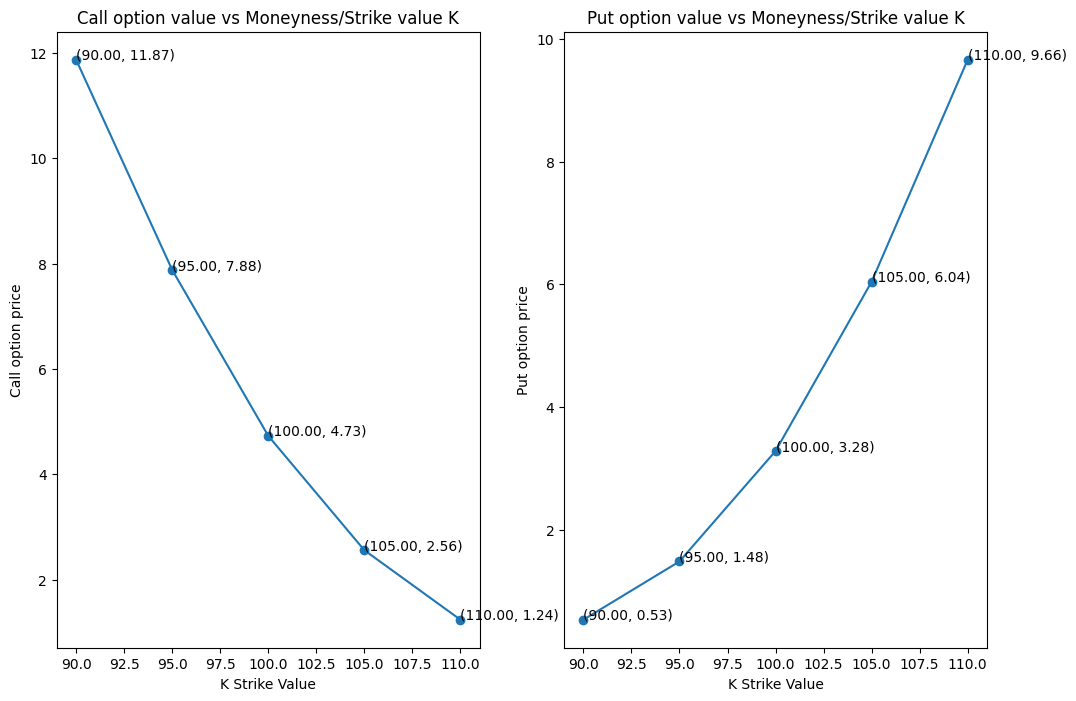

In [82]:
import numpy as np

# Function to simulate stock prices using Geometric Brownian Motion
def simulate_stock_prices(S0, r, sigma, T, N, M):
    dt = T / N  # Time step
    stock_prices = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt +
                                         sigma * np.sqrt(dt) * np.random.randn(M, N), axis=1))
    return stock_prices
# Parameters
S0 = 100  # Initial stock price
#K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity in years (3 months)
N = int(T * 252)  # Number of steps (daily simulations, 252 trading days in a year)
M = 10000  # Number of simulations

# Seed for reproducibility
np.random.seed(0)

# Simulate stock prices
stock_prices = simulate_stock_prices(S0, r, sigma, T, N, M)

def option_price(stock_price,K,option = "C"):
  if option == "C":
    # American Call Option Pricing
    payoffs = np.maximum(stock_prices[:, -1] - K, 0)  # Payoff at maturity
    option_price = np.mean(payoffs) * np.exp(-r * T)  # Discounting back to present value
  else:
    # American Call Option Pricing
    payoffs = np.maximum(K - stock_prices[:, -1] , 0)  # Payoff at maturity
    option_price = np.mean(payoffs) * np.exp(-r * T)  # Discounting back to present value
  return option_price

k_moneyness = [0.9*S0,0.95*S0,S0,S0*1.05,S0*1.10]
# for Call option
option_prices_call=[]
option_prices_put=[]
for K in k_moneyness:
  option_prices_call.append(round(option_price(stock_prices,K),2))
  option_prices_put.append(round(option_price(stock_prices,K,option="P"),2))

print(option_prices_call)
print(option_prices_put)

fig,axs = plt.subplots(1,2,figsize=(12, 8))
axs[0].plot(k_moneyness,option_prices_call,'-o')
for xy in zip(k_moneyness,option_prices_call):                                       # <--
    axs[0].annotate('(%.2f, %s)' % xy, xy=xy, textcoords='data')
axs[1].plot(k_moneyness,option_prices_put,'-o')
for xy in zip(k_moneyness,option_prices_put):                                       # <--
    axs[1].annotate('(%.2f, %s)' % xy, xy=xy, textcoords='data')
axs[0].set_title("Call option value vs Moneyness/Strike value K")
axs[1].set_title("Put option value vs Moneyness/Strike value K")
axs[0].set_xlabel("K Strike Value")
axs[1].set_xlabel("K Strike Value")
axs[0].set_ylabel("Call option price")
axs[1].set_ylabel("Put option price")


In [83]:
### 7.

In [84]:
import numpy as np
from scipy.stats import norm

# Black-Scholes Formulas for call and put options
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Function to calculate Delta
def delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        return norm.cdf(d1)
    else:
        return norm.cdf(d1) - 1

# Parameters
S0 = 100  # Initial stock price
r = 0.05  # Annual risk-free interest rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to expiration in years (3 months)

# Moneyness
K_call = 110 / 100 * S0  # 110% moneyness for call
K_put = 95 / 100 * S0   # 95% moneyness for put

# Pricing options
call_price = black_scholes_call(S0, K_call, T, r, sigma)
put_price = black_scholes_put(S0, K_put, T, r, sigma)

# Portfolio 1: Buy Call and Put
delta_call = delta(S0, K_call, T, r, sigma, "call")
delta_put = delta(S0, K_put, T, r, sigma, "put")
portfolio_delta_1 = delta_call + delta_put

# Portfolio 2: Buy Call and Sell Put
portfolio_delta_2 = delta_call - delta_put

# Output results
print("Call Option Price:", call_price)
print("Put Option Price:", put_price)
print("Delta of Portfolio 1 (Buy Call and Put):", portfolio_delta_1)
print("Delta of Portfolio 2 (Buy Call and Sell Put):", portfolio_delta_2)

# For delta-hedging, you would typically trade the underlying asset to offset the delta of the portfolio
# For Portfolio 1, if delta > 0, sell delta * number_of_options shares of the underlying; if delta < 0, buy abs(delta) * number_of_options shares
# Similar approach for Portfolio 2


Call Option Price: 1.1911316636130636
Put Option Price: 1.5342604771222845
Delta of Portfolio 1 (Buy Call and Put): -0.027493003408300243
Delta of Portfolio 2 (Buy Call and Sell Put): 0.4640020062196471


In [85]:
# Question 8,9

In [86]:
import numpy as np
import math

def simulate_stock_price_path(S0, r, sigma, T, N):
    """Simulates a stock price path using the Geometric Brownian Motion model.

    Args:
        S0: The initial stock price.
        r: The interest rate.
        sigma: The volatility.
        T: The time to maturity in years.
        N: The number of time steps.

    Returns:
        A numpy array containing the simulated stock price path.
    """

    dt = T
    Z = np.random.standard_normal(N)
    S = S0 * np.exp((r - sigma**2 / 2) * dt + sigma * math.sqrt(dt) * Z)
    return S

def check_for_barrier_breaches(S, B):
    """Checks if the barrier level is breached at any time.

    Args:
        S: A numpy array containing the simulated stock price path.
        B: The barrier level.

    Returns:
        A boolean numpy array indicating whether the barrier is breached at each time step.
    """

    barrier_breaches = np.where(S >= B, True, False)
    return barrier_breaches

def calculate_payoff(S, K, B, call=True,option_type = "UAI"):
    """Calculates the payoff of the option.

    Args:
        S: A numpy array containing the simulated stock price path.
        K: The strike price.
        B: The barrier level.
        call: A boolean indicating whether the option is a call or put option.

    Returns:
        A numpy array containing the payoffs of the option.
    """

    if call:
        payoff = np.maximum(S - K, 0)
    else:
        payoff = np.maximum(K - S, 0)
    barrier_breaches = check_for_barrier_breaches(S, B)
    if option_type == "UAO":
      payoff = payoff * np.where(barrier_breaches, 0, 1)
    elif option_type == "UAI":
      payoff = payoff * np.where(barrier_breaches, 1, 0)
    else:
      payoff=payoff
    return payoff

def price_uao_call(S0, r, sigma, T, N, K, B):
    """Prices an Up-and-Out (UAO) call option using Monte-Carlo methods.

    Args:
        S0: The initial stock price.
        r: The interest rate.
        sigma: The volatility.
        T: The time to maturity in years.
        N: The number of time steps.
        K: The strike price.
        B: The barrier level.

    Returns:
        The price of the UAO call option.
    """

    payoffs = calculate_payoff(simulate_stock_price_path(S0, r, sigma, T, N), K, B, call=True,option_type = "UAO")
    price = (1 / N) * sum(payoffs)
    return price

def price_uai_call(S0, r, sigma, T, N, K, B):
    """Prices an Up-and-In (UAO) call option using Monte-Carlo methods.

    Args:
        S0: The initial stock price.
        r: The interest rate.
        sigma: The volatility.
        T: The time to maturity in years.
        N: The number of time steps.
        K: The strike price.
        B: The barrier level.

    Returns:
        The price of the UAI call option.
    """

    payoffs = calculate_payoff(simulate_stock_price_path(S0, r, sigma, T, N), K, B, call=True,option_type = "UAI")
    price = (1 / N) * sum(payoffs)
    return price

def option_price(S0, r, sigma, T, N, K, B,iscall=True):
  stock_price=simulate_stock_price_path(S0, r, sigma, T, N)
  payoffs_vanilla = calculate_payoff(stock_price, K, B, call=iscall,option_type = "vanilla")
  payoffs_UAI = calculate_payoff(stock_price, K, B, call=iscall,option_type = "UAI")
  payoffs_UAO = calculate_payoff(stock_price, K, B, call=iscall,option_type = "UAO")
  price={}
  price["price_vanilla"] = (1 / N) * sum(payoffs_vanilla)
  price["price_UAI"] = (1 / N) * sum(payoffs_UAI)
  price["price_UAO"] = (1 / N) * sum(payoffs_UAO)

  return price
# Set the parameters for the option
S0 = 120  # Initial stock price
r = 0.06  # Interest rate
sigma = 0.3  # Volatility
T = 8/12  # Time to maturity in years
N = 1000  # Number of time steps
K = 120  # Strike price
B = 141  # Barrier level

# Calculate the price of the option
price = option_price(S0, r, sigma, T, N, K, B)

# Print the price of the option
print("Price of the UAO call option:", price["price_UAO"])

# Calculate the price of the option

# Print the price of the option
print("Price of the UAI call option:", price["price_UAI"])

print("Price of the Vanilla call option:", price["price_vanilla"])

print(round(price["price_vanilla"],2) == round(price["price_UAI"]+price["price_UAO"],2))

price = option_price(S0, r, sigma, T, N, K, B,iscall=False)

# Print the price of the option
print("Price of the UAO Put option:", price["price_UAO"])

# Calculate the price of the option

# Print the price of the option
print("Price of the UAI Put option:", price["price_UAI"])

print("Price of the Vanilla Put option:", price["price_vanilla"])

print(round(price["price_vanilla"],2) == round(price["price_UAI"]+price["price_UAO"],2))

Price of the UAO call option: 2.22542111717742
Price of the UAI call option: 12.219340679894126
Price of the Vanilla call option: 14.44476179707155
True
Price of the UAO Put option: 9.301943703163941
Price of the UAI Put option: 0.0
Price of the Vanilla Put option: 9.301943703163941
True
